C:\Users\admin\AppData\Local\Temp\ipykernel_16832\3282284339.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
[*********************100%***********************]  1 of 1 completed
C:\Users\admin\AppData\Local\Temp\ipykernel_16832\3282284339.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  latest_price = float(data["Close"].iloc[-1])


Sample data for MOTHERSON.NS:
Price             Close         High          Low         Open       Volume
Ticker     MOTHERSON.NS MOTHERSON.NS MOTHERSON.NS MOTHERSON.NS MOTHERSON.NS
Date                                                                       
2024-01-01    70.090538    71.779065    67.872277    68.070925     79068615
2024-01-02    69.527702    72.110158    68.501342    71.447992     33922234
2024-01-03    67.474976    69.991216    67.110781    69.858784     33251532
2024-01-04    68.501335    69.196609    67.607406    67.673622     32104879
2024-01-05    68.898636    70.620270    68.236462    69.064175     36242838

Latest closing price for MOTHERSON.NS: 104.69 INR


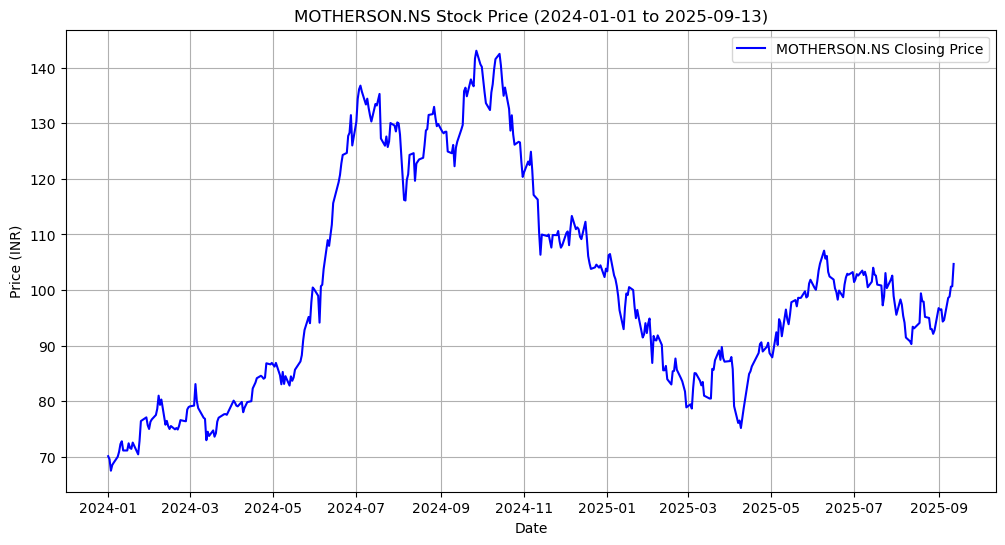

In [12]:
#!/usr/bin/env python3
# motherson_fetch.py
# Fetch MOTHERSON.NS stock data, save CSV & PNG into outputs/

import os
import sys
from datetime import datetime
import pandas as pd
import yfinance as yf

# Use headless backend for matplotlib (no GUI needed)
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

# Stock symbol & dates
TICKER = os.getenv("TICKER", "MOTHERSON.NS")
START_DATE = os.getenv("START_DATE", "2023-01-01")

def main():
    end_date = pd.Timestamp.today().strftime("%Y-%m-%d")
    out_dir = "outputs"
    os.makedirs(out_dir, exist_ok=True)

    print(f"Fetching {TICKER} from {START_DATE} to {end_date} ...")
    try:
        data = yf.download(TICKER, start=START_DATE, end=end_date, interval="1d", progress=False)
    except Exception as e:
        print("Error while downloading:", e)
        sys.exit(1)

    if data is None or data.empty:
        print("No data returned. Exiting.")
        sys.exit(1)

    # Save CSV with today's date
    date_str = pd.Timestamp.today().strftime("%Y-%m-%d")
    csv_path = os.path.join(out_dir, f"{TICKER}_{date_str}.csv")
    data.to_csv(csv_path)
    print(f"Saved CSV: {csv_path}")

    # Save latest price
    latest_price = float(data["Close"].iloc[-1])
    lp_path = os.path.join(out_dir, "latest_price.txt")
    with open(lp_path, "w") as fh:
        fh.write(f"{date_str},{TICKER},{latest_price}\n")
    print(f"Saved latest price: {lp_path}")

    # Save plot as PNG
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data["Close"], label=f"{TICKER} Close")
    plt.xlabel("Date")
    plt.ylabel("Price (INR)")
    plt.title(f"{TICKER} Closing Price ({START_DATE} to {end_date})")
    plt.legend()
    plt.grid(True)
    png_path = os.path.join(out_dir, f"{TICKER}_{date_str}.png")
    plt.savefig(png_path, bbox_inches="tight")
    plt.close()
    print(f"Saved plot: {png_path}")

    print("Done.")

if __name__ == "__main__":
    main()
